##Importando bibliotecas
https://matplotlib.org/

https://pandas.pydata.org/

https://seaborn.pydata.org/

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\guilh\OneDrive\Desktop\Clean_Dataset.csv")

data = data.drop('Unnamed: 0', axis=1)

data.head()



,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [6]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [7]:
data.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [8]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

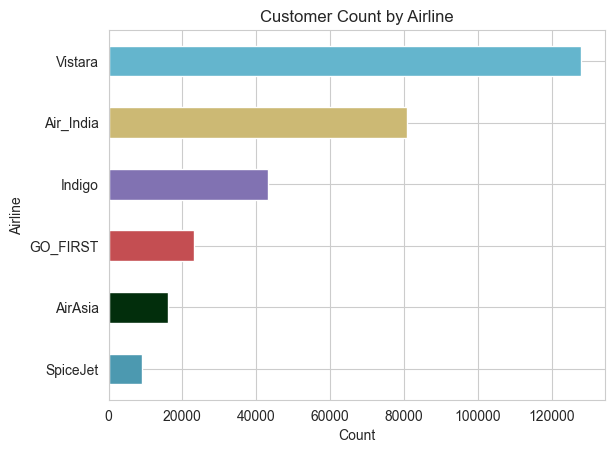

In [9]:
airline_count = data['airline'].value_counts().sort_values(ascending = True)
sns.set_style("whitegrid")
colors = ['#4c99b0', '#022e0c', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

airline_count.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

In [10]:
medium_price = data.groupby('airline')['price'].mean().round()

medium_price

airline
AirAsia       4091.0
Air_India    23507.0
GO_FIRST      5652.0
Indigo        5324.0
SpiceJet      6179.0
Vistara      30397.0
Name: price, dtype: float64

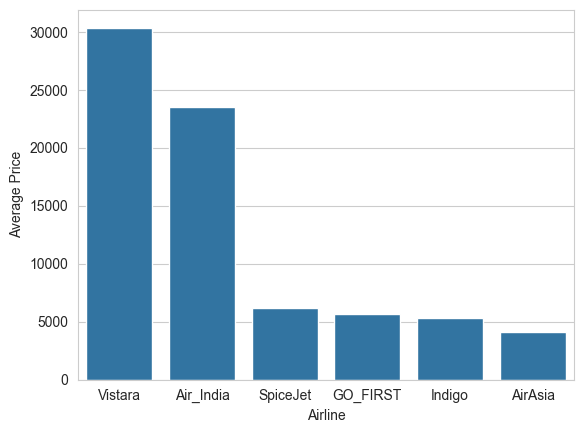

In [11]:
medium_price = data.groupby('airline')['price'].mean().reset_index()
medium_price = medium_price.sort_values(by='price', ascending=False)

sns.barplot(x='airline', y='price', data=medium_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

In [43]:
correlation = data['price'].corr(data['days_left'])
correlation

-0.09194853217143828

In [55]:
data_days = data[data['days_left'].isin([1,2])]

data_days

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
298090,Vistara,UK-838,Chennai,Night,one,Evening,Hyderabad,Business,22.83,2,66129
298091,Vistara,UK-834,Chennai,Evening,one,Morning,Hyderabad,Business,16.50,2,82784
298092,Vistara,UK-834,Chennai,Evening,one,Afternoon,Hyderabad,Business,19.42,2,82784
298093,Vistara,UK-834,Chennai,Evening,one,Evening,Hyderabad,Business,23.83,2,82784


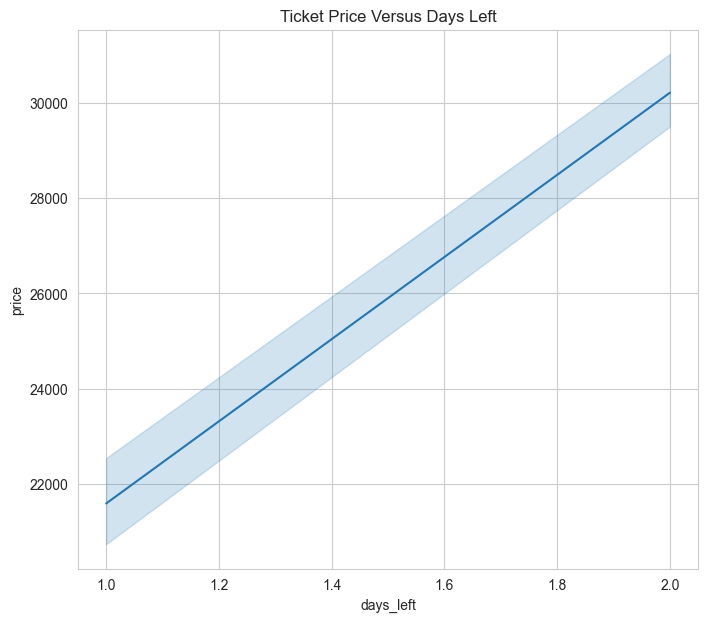

In [79]:
plt.figure(figsize=(8, 7))
sns.lineplot(data=data_days, x='days_left', y='price')
plt.title('Ticket Price Versus Days Left')
plt.show()

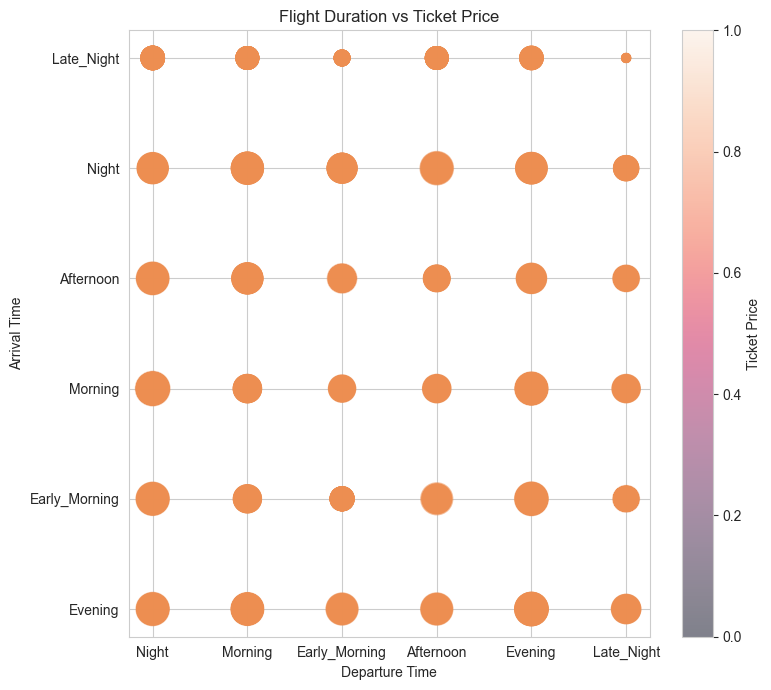

In [80]:
plt.figure(figsize=(8, 7))
plt.scatter(data['arrival_time'], data['departure_time'], s=data['price']*0.005, color='#ed8e51', alpha=0.5)

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")

plt.colorbar(label='Ticket Price')

plt.tight_layout()
plt.show()


C:\Users\guilh\AppData\Local\Temp\ipykernel_4256\3736141634.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='source_city', y='price', data=data, palette='Set2')


<Axes: xlabel='source_city', ylabel='price'>

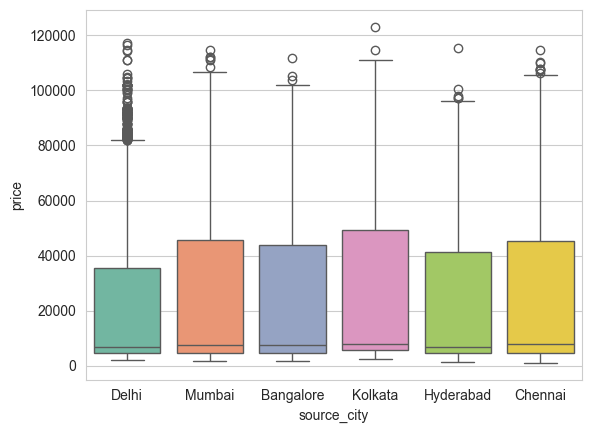

In [84]:
sns.boxplot(x='source_city', y='price', data=data, palette='Set2')

C:\Users\guilh\AppData\Local\Temp\ipykernel_4256\365695803.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='destination_city', y='price', data=data, palette='Set2')


<Axes: xlabel='destination_city', ylabel='price'>

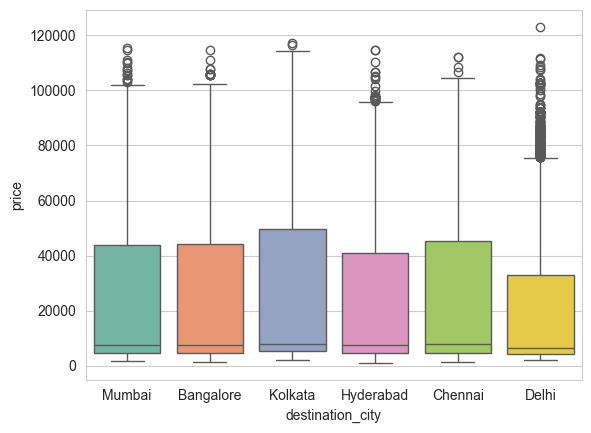

In [85]:
sns.boxplot(x='destination_city', y='price', data=data, palette='Set2')

<function matplotlib.pyplot.show(close=None, block=None)>

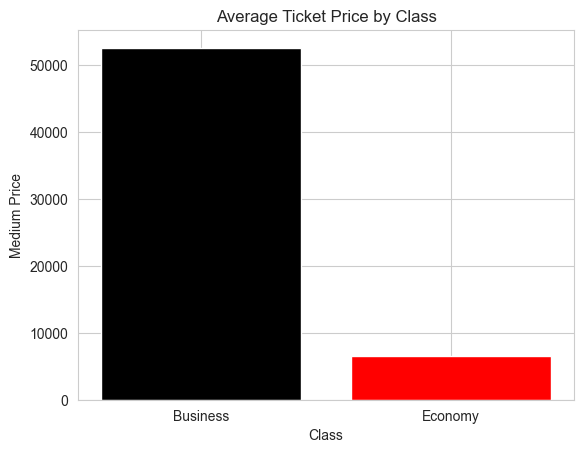

In [95]:
ticket_price = data.groupby('class')[['price']].mean()

plt.bar(ticket_price.index,ticket_price['price'], color=['black','red'])

plt.xlabel('Class')
plt.ylabel('Medium Price')
plt.title('Average Ticket Price by Class')
plt.show